In [2]:
#immporting libraries
import tensorflow as tf
import random
import numpy as np
from tensorflow.keras import preprocessing, layers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

seed = 76 #number of seed to get the same results

### creating the train dataset and the validation dataset
**image size** = 48*48, **image color mode**= gray


In [6]:

train_data=preprocessing.image_dataset_from_directory(
    directory="train",
   color_mode="grayscale",
    
    seed=seed,
    image_size=(48,48),
    batch_size=64
)
val_data = preprocessing.image_dataset_from_directory(
    directory="test",
    color_mode="grayscale",
    
    seed=seed,
    image_size=(48,48),
    batch_size=64
)
class_names = val_data.class_names
print(f"Classes: {class_names})")

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.
Classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'])


##### creating the CNN model:
- data augmentation layers
- Convolutional layers
- fully connected layers 


In [ ]:
model = tf.keras.Sequential([
        #data augmentation and normalization
        tf.keras.layers.RandomFlip("horizontal",input_shape=(48, 48, 1)),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.2),
        tf.keras.layers.RandomContrast(0.2),
        tf.keras.layers.RandomBrightness(0.2),
        tf.keras.layers.Rescaling(1./255),

        #convolutional layers
        tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", input_shape=(48, 48, 1),
            kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu",
            kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.1),

        tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu",
            kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu",
            kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.1),

        #fully connected layers
        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(512, activation="relu",
            kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Dense(256, activation="relu",
            kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Dense(7, activation="softmax")
    ])

In [50]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_flip_13 (RandomFlip)          │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_13 (RandomRotation)  │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_13 (RandomZoom)          │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_contrast_13 (RandomContrast)  │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_brightness_13                 │ (None, 48, 48, 1)           │               0 │
│ (RandomBrightness)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_13 (Rescaling)             │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 46, 46, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_72               │ (None, 46, 46, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 46, 46, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_73               │ (None, 46, 46, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_64 (Dropout)                 │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 23, 23, 256)         │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_74               │ (None, 23, 23, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 23, 23, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_75               │ (None, 23, 23, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_65 (Dropout)                 │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 30976)               │              

 Total params: 16,774,343 (63.99 MB)

 Trainable params: 16,771,527 (63.98 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [ ]:
#definig the loss fonction sheduler and early stopping
lrsheduler=ReduceLROnPlateau(monitor="val_loss",factor=0.5,patience=1,verbose=1,min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=["accuracy"])


In [ ]:
#defining the class weights due to data imbalance
from sklearn.utils.class_weight import compute_class_weight
y_train = np.concatenate([y for _, y in train_data], axis=0)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

print("class weights :", class_weights_dict)




class weight : {0: np.float64(1.0266046844269623), 1: np.float64(9.406618610747051), 2: np.float64(1.0010460615781582), 3: np.float64(0.5684387684387684), 4: np.float64(0.8260394187886635), 5: np.float64(0.8491274770777877), 6: np.float64(1.293372978330405)}


In [ ]:
#training the model
history=model.fit(train_data, validation_data=val_data, epochs=30, class_weight=class_weights_dict,verbose=1,callbacks=[lrsheduler,early_stopping])

Epoch 1/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 404s 900ms/step - accuracy: 0.4561 - loss: 1.9544 - val_accuracy: 0.4873 - val_loss: 1.8829 - learning_rate: 1.0000e-04
Epoch 2/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 387s 862ms/step - accuracy: 0.4664 - loss: 1.9304 - val_accuracy: 0.5124 - val_loss: 1.8257 - learning_rate: 1.0000e-04
Epoch 3/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 855ms/step - accuracy: 0.4730 - loss: 1.9081  
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
449/449 ━━━━━━━━━━━━━━━━━━━━ 404s 901ms/step - accuracy: 0.4730 - loss: 1.9081 - val_accuracy: 0.4749 - val_loss: 1.9064 - learning_rate: 1.0000e-04
Epoch 4/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 401s 893ms/step - accuracy: 0.4804 - loss: 1.8760 - val_accuracy: 0.5205 - val_loss: 1.7848 - learning_rate: 5.0000e-05
Epoch 5/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 402s 894ms/step - accuracy: 0.4914 - loss: 1.8423 - val_accuracy: 0.5471 - val_loss: 1.6958 - learning_rate: 5.0000e-05
Epoch 6/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 84

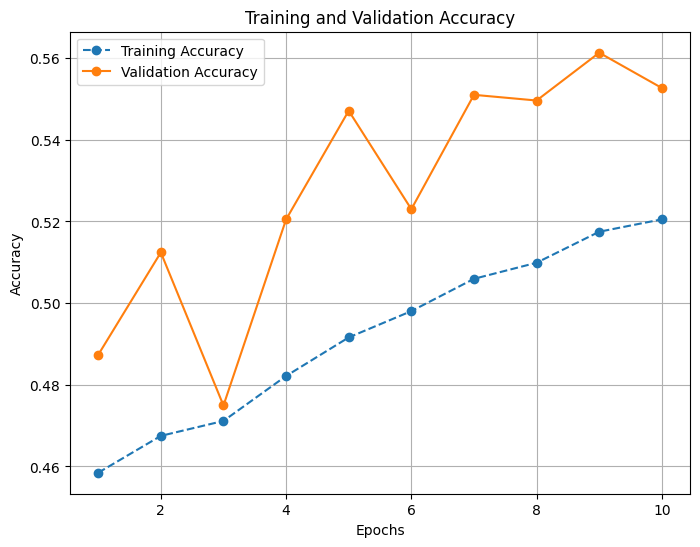

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, label='Training Accuracy', linestyle='dashed', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', linestyle='solid', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
model.save("modelv3.keras")

In [3]:
model= tf.keras.models.load_model("modelv3.keras")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted Labels: [4 3 0 5 5 3 5 2 0 5 3 4 3 5 5 2 3 6 4 4 3 4 5 3 6 6 3 3 3 0 5 4 3 3 2 3 4
 6 6 4 4 3 4 6 3 3 0 4 6 2 0 6 6 3 5 5 5 6 4 1 1 0 5 6]
Actual Labels: [3 3 3 5 0 3 3 2 2 3 3 3 3 2 3 4 3 6 4 5 3 4 5 3 6 4 3 3 3 0 5 2 3 3 3 0 0
 6 6 4 4 4 4 6 3 3 4 0 6 5 0 6 6 3 5 5 0 6 2 1 4 0 2 6]


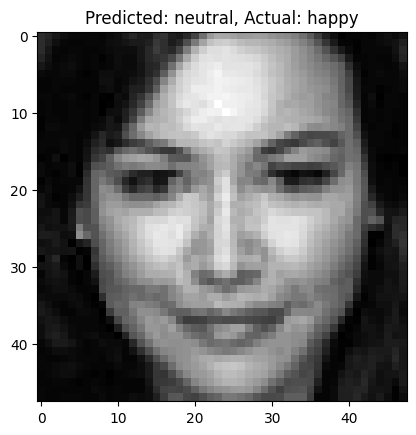

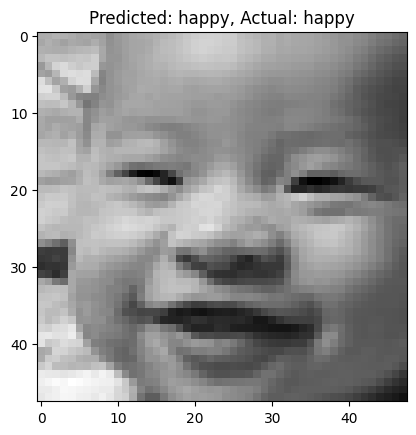

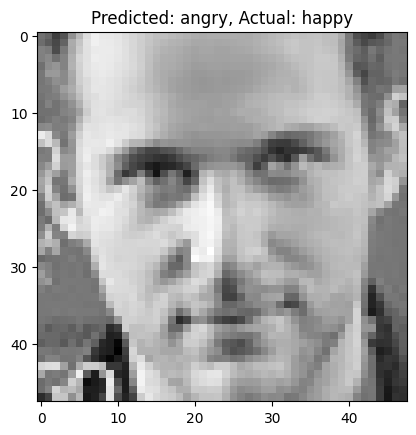

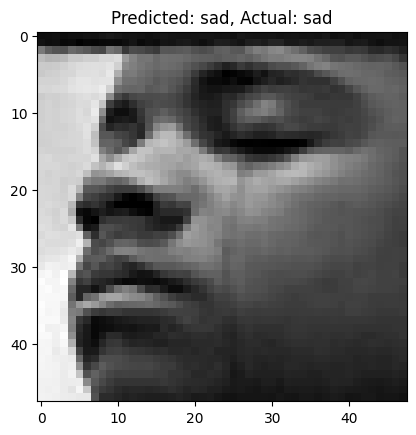

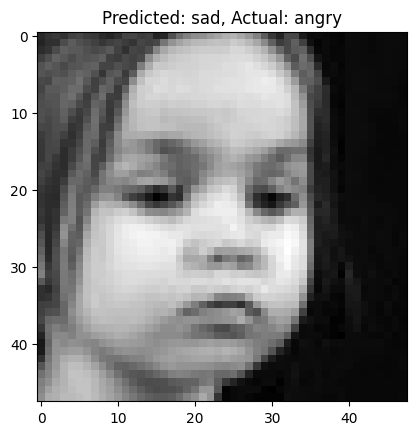

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted Labels: [4 3 0 2 0 2 0 5 6 3 4 1 1 2 3 3 6 5 2 0 4 4 1 3 4 5 4 3 1 4 4 5 4 4 2 4 4
 4 4 0 5 3 5 1 3 4 1 5 6 4 6 3 3 3 3 3 2 5 6 6 4 4 2 4]
Actual Labels: [4 3 3 2 4 2 5 5 2 3 4 1 1 2 4 3 6 2 2 5 4 6 0 3 5 2 5 3 1 4 4 5 2 0 2 5 4
 5 4 0 2 3 2 1 5 4 0 5 6 5 6 3 3 3 3 3 2 4 6 6 4 4 0 4]


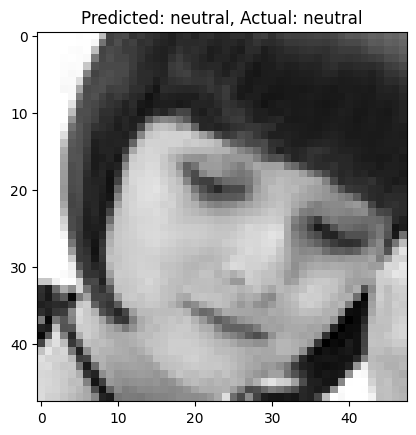

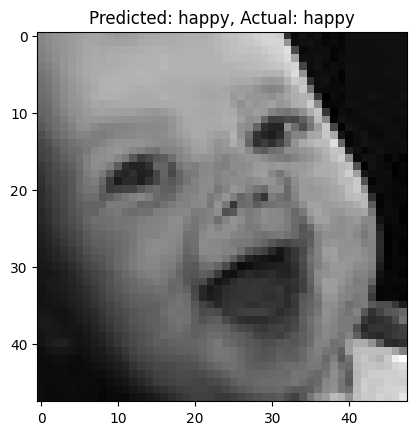

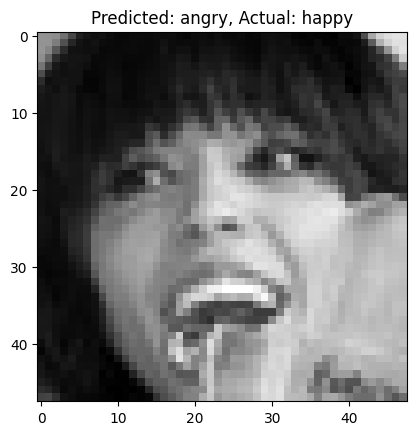

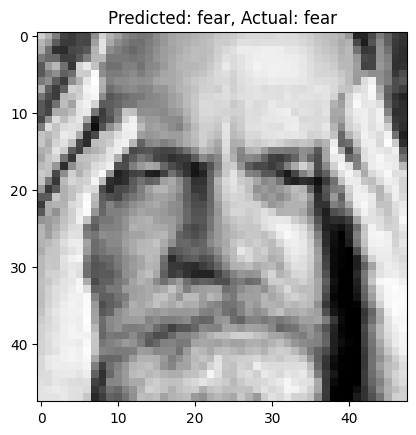

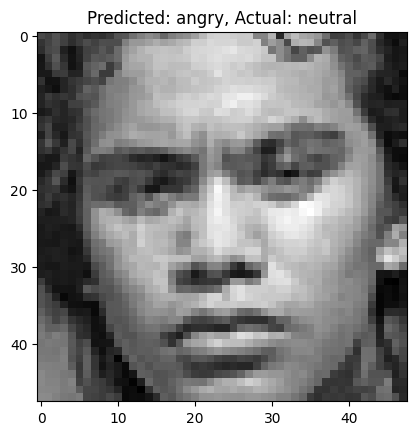

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of validation data
for images, labels in val_data.take(2):
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    # Print predicted and actual labels
    print("Predicted Labels:", predicted_labels)
    print("Actual Labels:", labels.numpy())

    # Visualize some samples
    for i in range(5):  # Display first 5 samples
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.title(f"Predicted: {class_names[predicted_labels[i]]}, Actual: {class_names[labels[i]]}")
        plt.show()